# Jarvis march algorithm

step 1 : Find a point lies on the convex hull as the starting position.I choose the leftmost point as the starting position,
where I name it 'startpoint'.
step 1.1 : Create a variable called 'origin'(p_0) , and put 'startpoint' as its initial value.
step 2 : Take a random point from 'inputSet' except 'origin',where I name the random point 'endpoint'(p_1).
step 2.1 : Suppose 'endpoint' is the next point lies on the convex hull.
step 3 : Use a loop to confirm a new point lies on the convex hull.(push the new point)
        (p2 traverses 'inpuSet' except 'endpoint' and 'origin' 
         if vector P_0P_1 cross vector P_0P2 > 0 ,that means P2 is on the left of P_1,replace P2 with P_1(endpoint),
         repeat the operation until the end of the traversal.)
step 4 : Assign the new point to 'origin'.(pop the new point to 'origin')
step 5 : Repeat step 2-4 until find all points lie on the convex hull.

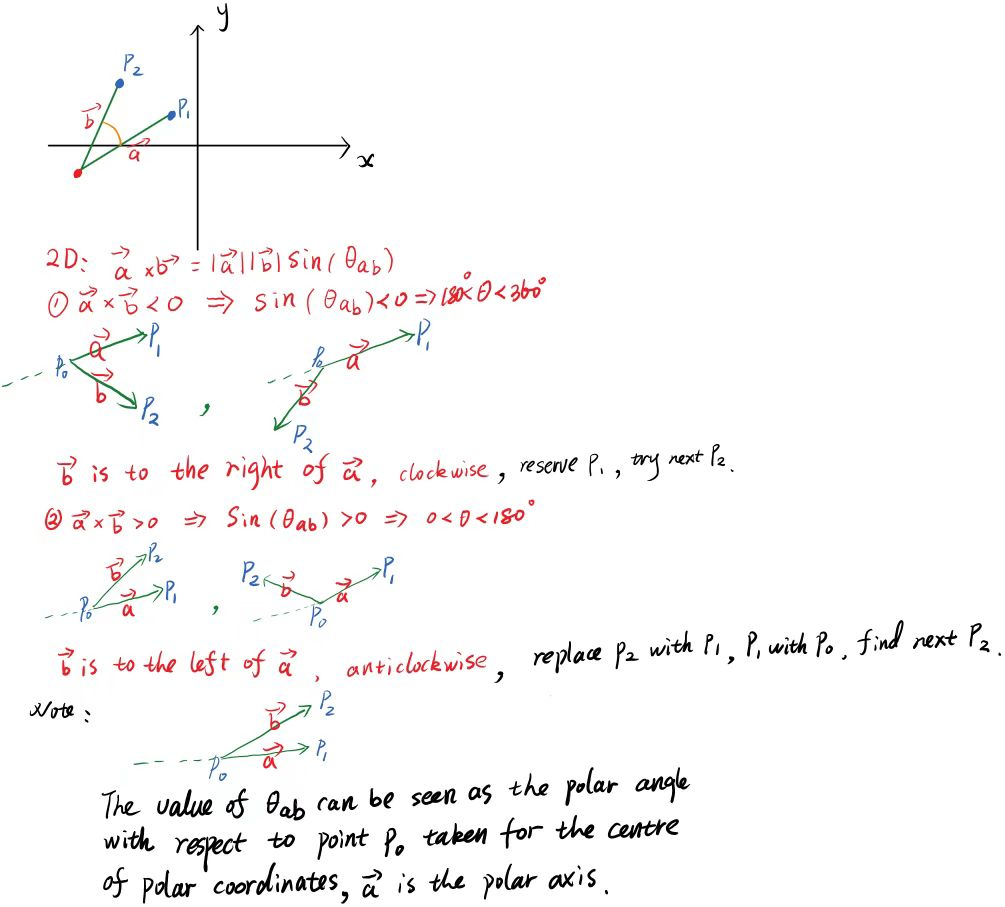

In [81]:
#def jarvismarch(inputSet):
def jarvismarch(inputSet):
    #p is the set of points
    points = inputSet
    #Find an origin point outside the set,P_0.
    startpoint = min(inputSet) 
    origin = startpoint
    outputSet = []
    endpoint = None
    while endpoint is not startpoint: #The endpoint goes back to the startpoint and the algorithm is completed.
        p1 = None
        for p in points: #traverse all points,give p1 arbitrary value except origin.
            if p is origin: 
                continue
            else:
                p1 = p
                break
        endpoint = p1
        for p2 in points: #traverse all points , except p_0 and p_1.
            if p2 is origin or p2 is p1:
                continue
            else:
                direction =((endpoint[0]-origin[0])*(p2[1]-origin[1]))-((p2[0]-origin[0])*(endpoint[1]-origin[1])) #find points
                                                                                                                   #anticlockwise
                if direction > 0:
                     endpoint = p2  #update endpoint
        outputSet.append(endpoint)
        origin = endpoint
    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [83]:
import random
#code for random data generation
def random_data(N):
    inputlista = [[random.randint(0, 32767) for j in range(1, 3)] for i in range(1,N)] #get N pairs random points
    return inputlista 
#code for worst case data generation O(n*H) n==h
import math 
def worst_case_data(N):#The worst case is that all of the input points lie on the convex hull,eg,circle or ellipse.
    inputlistb = []
    a,b=16383,16383 #take midpoint of the interval as center of the circle
    r = 16383  #half of the interval as radius
    for i in range(N ):  
        theta=random.uniform(0,2*math.pi)
        x =int( a + r * math.cos(theta))  #points on the circle
        y = int(b + r * math.sin(theta))
        inputlistb.append([x,y])
    return inputlistb


Use the cell below for all python code needed to test the `jarvismarch()` function on the data generated above.

In [102]:
import timeit
#test code
# random data time
timelista = []
# for N in [100,500, 1000, 5000, 10000, 15000,20000]:
for N in [100,200,500]:
    inputlista=random_data(N)
    t = timeit.timeit("jarvismarch(inputSet=inputlista)","from __main__ import jarvismarch,inputlista ",number=100)
    timelista.append(t)


#worst case data time
timelistb =[]
# for N in [100,500, 1000, 5000, 10000, 15000,20000]:
for N in [100,200,500]:
    inputlistb=worst_case_data(N)
    t = timeit.timeit("jarvismarch(inputSet=inputlistb)","from __main__ import jarvismarch,inputlistb ",number=100)
    timelistb.append(t)


In [103]:
print(timelista)
print(timelistb)

[0.06292310000571888, 0.13674249999894528, 0.35816670000349404]
[0.4547826999987592, 1.7261184000017238, 10.016094799997518]


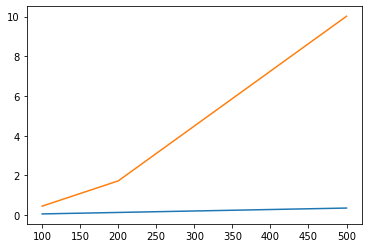

In [105]:
import matplotlib.pyplot as plt
x = [100,200,500]
plt.figure()
plt.plot(x,timelista)
plt.plot(x,timelistb)
plt.show()

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

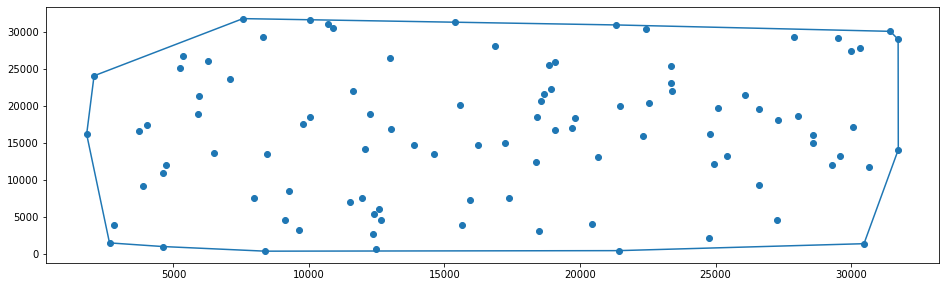

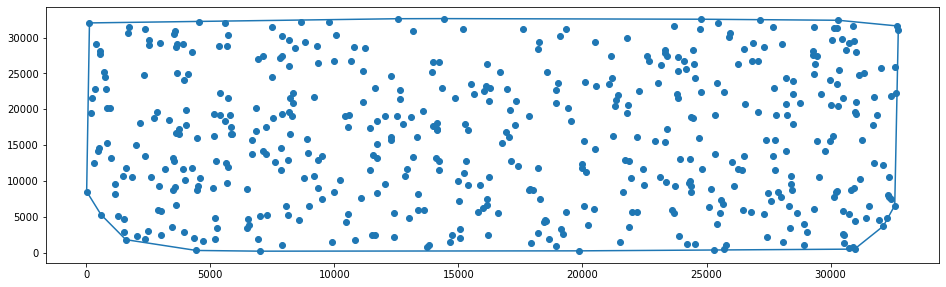

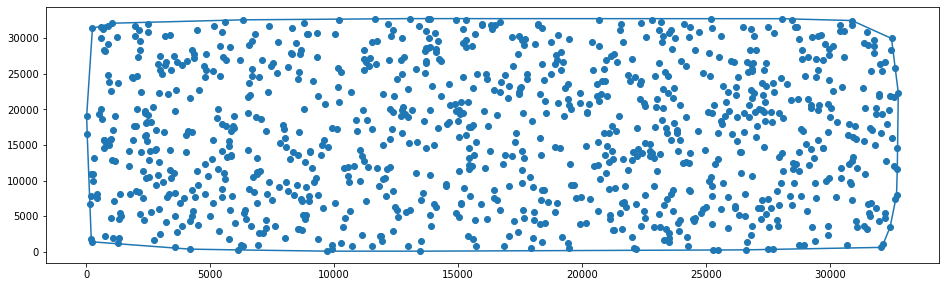

In [111]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm
#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

for N in [100,500, 1000]:
    inputSet = random_data(N)
    outputSet = jarvismarch(inputSet)
    i=1
    plt.figure(figsize=(16,16))
    plt.subplot(3,1,i)
    #first do a scatter plot of the inputSet
    input_xs, input_ys = zip(*inputSet)
    plt.scatter(input_xs, input_ys)
    #then do a polygon plot of the computed covex hull
    outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
    output_xs, output_ys = zip(*outputSet) 
    plt.plot(output_xs, output_ys) 
plt.show() 




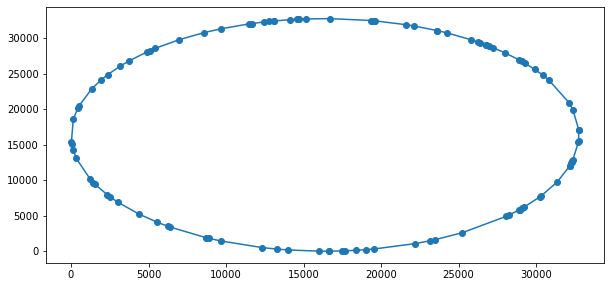

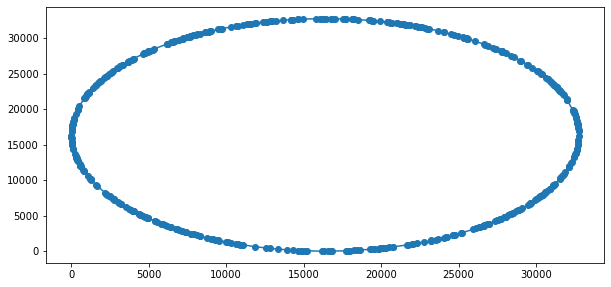

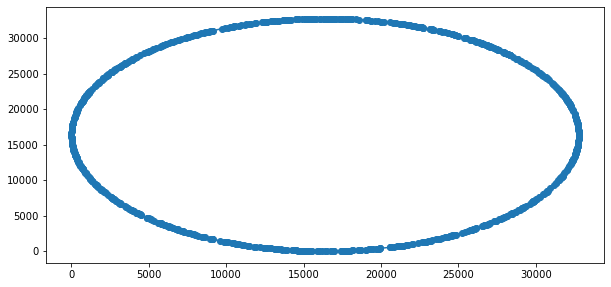

In [114]:
for N in [100,500, 1000]:
    inputSet = worst_case_data(N)
    outputSet = jarvismarch(inputSet)
    i=1
    plt.figure(figsize=(10,16))
    plt.subplot(3,1,i)
    #first do a scatter plot of the inputSet
    input_xs, input_ys = zip(*inputSet)
    plt.scatter(input_xs, input_ys)
    #then do a polygon plot of the computed covex hull
    outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
    output_xs, output_ys = zip(*outputSet) 
    plt.plot(output_xs, output_ys) 
plt.show() 
